# Kittipat Pattarajariya 6410412002 Rank 35 Score 0.97066

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [3]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz

In [4]:
df = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [5]:
testdf = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')
testdf.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


In [6]:
#Check train data detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

In [7]:
#Check test data detail
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2500 non-null   float64
 1   x2      2500 non-null   float64
 2   x3      2500 non-null   float64
 3   x4      2500 non-null   float64
 4   x5      2500 non-null   float64
 5   x6      2500 non-null   float64
 6   x7      2500 non-null   float64
 7   x8      2500 non-null   float64
 8   x9      2500 non-null   float64
 9   x10     2500 non-null   float64
 10  x11     2500 non-null   float64
 11  x12     2500 non-null   float64
 12  x13     2500 non-null   float64
 13  x14     2500 non-null   float64
 14  x15     2500 non-null   float64
 15  x16     2500 non-null   float64
 16  x17     2500 non-null   float64
 17  x18     2500 non-null   float64
 18  x19     2500 non-null   float64
 19  x20     2500 non-null   float64
dtypes: float64(20)
memory usage: 390.8 KB


# **Cleansing data**

In [8]:
#Check Missing Values of train data
df.isnull().sum()

x1     109
x2      34
x3      56
x4      93
x5      60
x6     118
x7      81
x8     135
x9       0
x10     79
x11     17
x12     12
x13    130
x14    124
x15    107
x16     93
x17    125
x18     20
x19    145
x20    126
y        0
dtype: int64

In [9]:
#Check Missing Values of test data
testdf.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
dtype: int64

In [10]:
# Delete All Missing Values
df=df.dropna()
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
y      0
dtype: int64

# **Exploratory Data Analysis(EDA)**

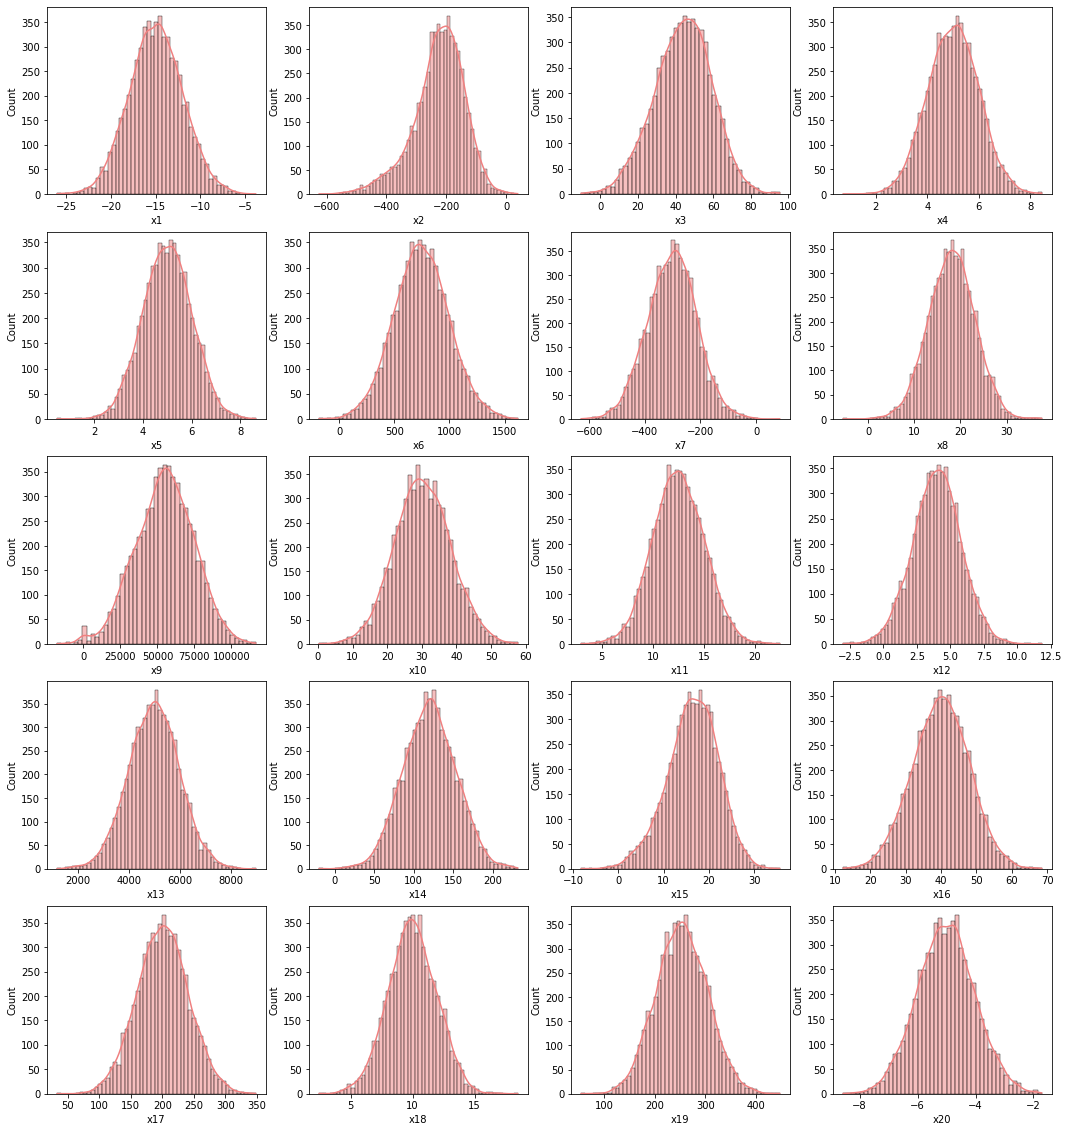

In [11]:
#Plot Histrogram Check Distribution of all Feature in train data
columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11','x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
fig, axs = plt.subplots(5,4, figsize=(18, 20))
i=0
for row in range(5):
    for col in range(4):
        sns.histplot(df,x=columns[i],kde=True,color='lightcoral',ax=axs[row, col])
        i+=1

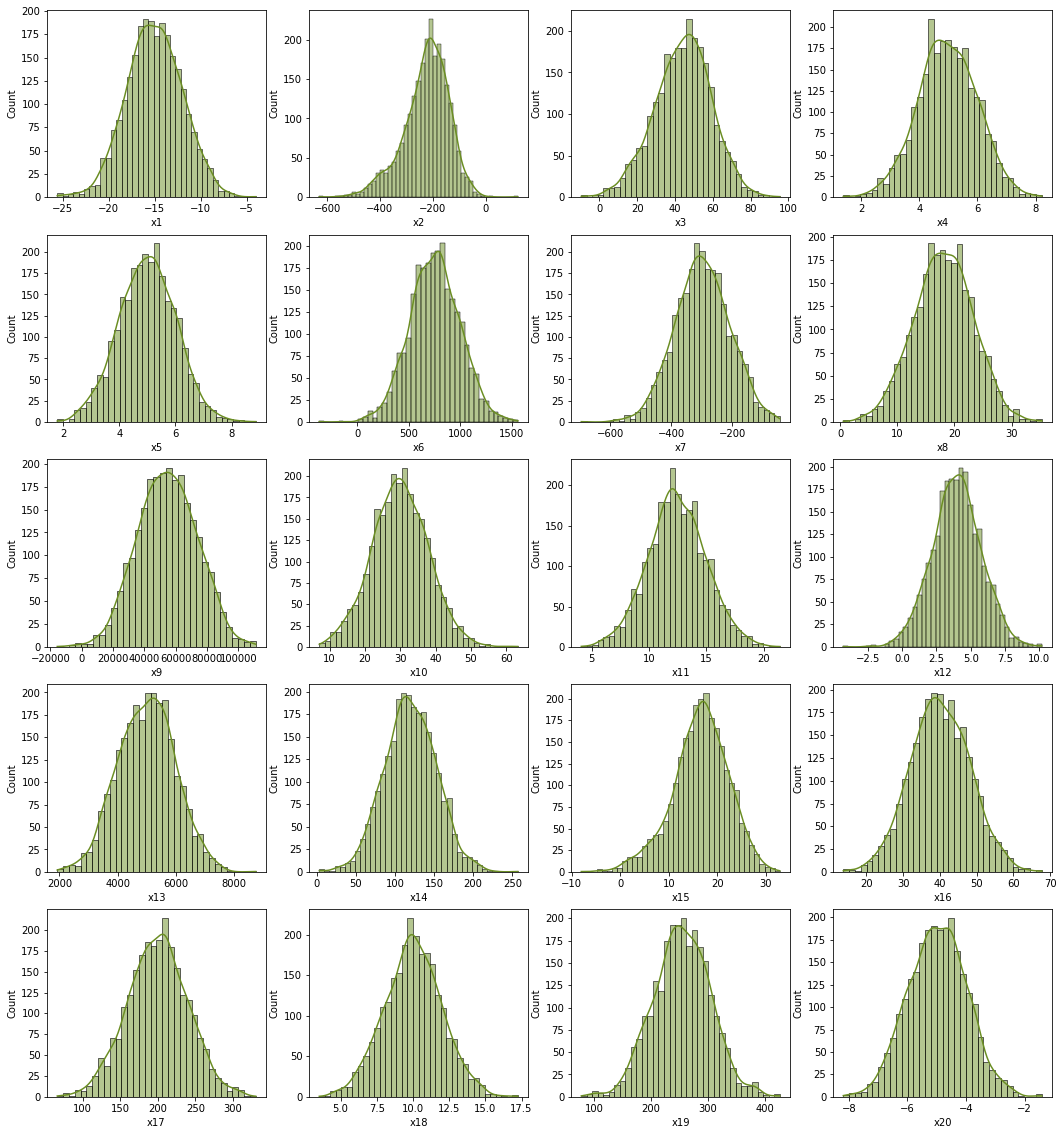

In [12]:
#Plot Histrogram Check Distribution of all Feature in test data
columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11','x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
fig, axs = plt.subplots(5,4, figsize=(18, 20))
i=0
for row in range(5):
    for col in range(4):
        sns.histplot(testdf,x=columns[i],kde=True,color='olivedrab',ax=axs[row, col])
        i+=1


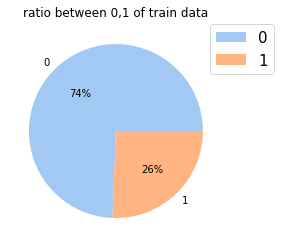

In [13]:
#Pie chart ratio between 0,1 of train data
colors = sns.color_palette('pastel')
x = (df['y'].value_counts(normalize=True)*100).reset_index()
plt.pie(x["y"], labels = x["index"], colors = colors, autopct='%.0f%%', textprops={'color':"black"})
plt.title("ratio between 0,1 of train data")
plt.rcParams['font.size']=15
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left")
plt.show()

# **Train&Test_Ridge_Classifier**

In [14]:
X=df.loc[:,'x1':'x20']
y=df["y"]

In [15]:
#Use Ridge regression
ridge=Ridge()
parameters={'alpha':[1e-3, 1e-2, 1e-1, 1]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r=ridge_regressor.fit(X,y)
print(r.best_estimator_)


Ridge(alpha=1)


In [16]:
r2=RidgeCV(alphas=[1],cv=5).fit(X, y)
p=r2.predict(testdf)
print(p)

[ 0.30210895  0.98104748  0.03289988 ... -0.02917229  1.01648187
 -0.04374326]


<AxesSubplot:ylabel='Count'>

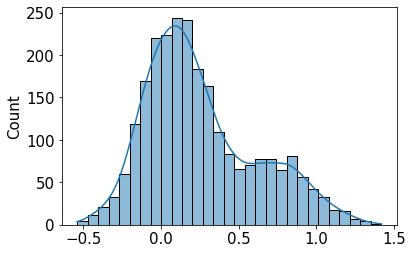

In [17]:
#Plot histrogram check distribution of predict values
sns.histplot(p,kde=True)

In [18]:
#Define threshold =0.5
a=[]
for i in p:
    if i>=0.5:
        a.append(1)
    else:
        a.append(0)
dict = {'Id':[i for i in range(1,2501)],'Expected': a}
dfa = pd.DataFrame(dict)
dfa.tail()

,Id,Expected
2495,2496,0
2496,2497,0
2497,2498,0
2498,2499,1
2499,2500,0


In [19]:
x2=dfa.Expected.value_counts()
x2

0    1917
1     583
Name: Expected, dtype: int64

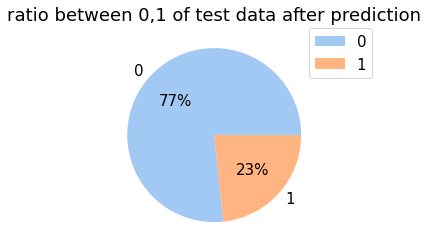

In [20]:
#ratio between 0,1 of test data after prediction
plt.pie(x2.values, labels = x2.index, colors = colors, autopct='%.0f%%', textprops={'color':"black"})
plt.title("ratio between 0,1 of test data after prediction")
plt.rcParams['font.size']=15
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left")
plt.show()

In [21]:
dfa.to_csv("Ridgesubmit.csv",index=False)

# **Train&Test_ExtraTree**

In [28]:
# gridseachcv
param_grid = {"max_depth": np.arange(17, 20),
                 "max_features": np.arange(17, 21),
                 "criterion":["entropy","gini"]}
tree = GridSearchCV(ExtraTreesClassifier(), param_grid,cv=5,n_jobs=-1,verbose=True)
tree.fit(X,y)
tree.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


ExtraTreesClassifier(criterion='entropy', max_depth=17, max_features=17)

In [ ]:
#Output from gridseachcv criterion='entropy', max_depth=17, max_features=17

In [29]:
et= ExtraTreesClassifier(criterion="entropy",max_depth=17,max_features=17)
et.fit(X,y)

ExtraTreesClassifier(criterion='entropy', max_depth=17, max_features=17)

In [30]:
p = et.predict(testdf)

In [31]:
d=[]
for i in p:
    d.append(i)
dict = {'Id':[i for i in range(1,2501)],'Expected': d}
dfd = pd.DataFrame(dict)
dfd.tail()

,Id,Expected
2495,2496,0
2496,2497,0
2497,2498,0
2498,2499,1
2499,2500,0


In [32]:
x3=dfd.Expected.value_counts()
x3

0    1886
1     614
Name: Expected, dtype: int64

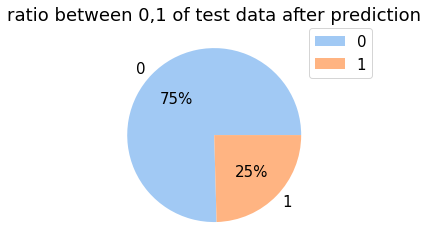

In [33]:
#ratio between 0,1 of test data after prediction
plt.pie(x3.values, labels = x3.index, colors = colors, autopct='%.0f%%', textprops={'color':"black"})
plt.title("ratio between 0,1 of test data after prediction")
plt.rcParams['font.size']=15
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left")
plt.show()

In [37]:
dfd.to_csv("Extratreesubmit.csv",index=False)